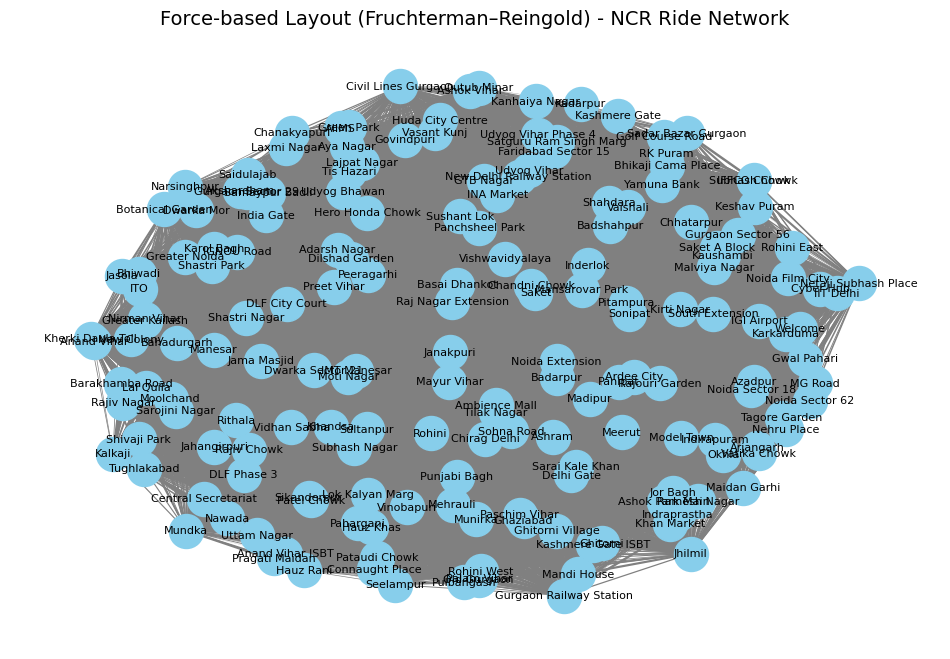


Each node represents a Pickup or Drop location.
Each edge represents a completed ride between two locations.
Thicker edges indicate longer or more frequent rides.
The layout shows clusters of frequently connected areas.



In [2]:
# ============================================================
# Force-based Graph Visualization (Fruchterman–Reingold Layout)
# ============================================================

# Step 1: Install Required Libraries
# !pip install networkx matplotlib pandas

# Step 2: Import Libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 3: Load Dataset
file_path = "/content/ncr_ride_bookings.csv"  # Update path if needed
data = pd.read_csv(file_path)

# Clean and preprocess data
data['Pickup Location'] = data['Pickup Location'].astype(str).str.replace('"', '').str.strip()
data['Drop Location'] = data['Drop Location'].astype(str).str.replace('"', '').str.strip()

# Remove missing or invalid locations
data = data.dropna(subset=['Pickup Location', 'Drop Location'])

# Filter only 'Completed' rides for meaningful connections
completed_rides = data[data['Booking Status'].str.contains("Completed", case=False, na=False)]

# Step 4: Create a Graph (Pickup → Drop)
G = nx.Graph()

for _, row in completed_rides.iterrows():
    pickup = row['Pickup Location']
    drop = row['Drop Location']
    if pickup != drop:
        distance = row.get('Ride Distance', 1)
        if G.has_edge(pickup, drop):
            # Increment edge weight if connection already exists
            G[pickup][drop]['weight'] += distance if pd.notna(distance) else 1
        else:
            G.add_edge(pickup, drop, weight=distance if pd.notna(distance) else 1)

# Step 5: Apply Force-based Layout (Fruchterman–Reingold)
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Step 6: Visualize the Graph
plt.figure(figsize=(12, 8))

# Extract edge weights for proportional thickness
weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(weights) if weights else 1

# Draw network
nx.draw_networkx(G, pos,
                 node_color='skyblue',
                 node_size=600,
                 font_size=8,
                 with_labels=True,
                 edge_color='gray',
                 width=[w / max_weight * 3 for w in weights])

plt.title("Force-based Layout (Fruchterman–Reingold) - NCR Ride Network", fontsize=14)
plt.axis('off')
plt.show()

# Step 7: Interpretation
print("""
Each node represents a Pickup or Drop location.
Each edge represents a completed ride between two locations.
Thicker edges indicate longer or more frequent rides.
The layout shows clusters of frequently connected areas.
""")


In [1]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.3 MB/s eta 0:00:00


In [3]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000
